In [1]:
from SimplexSpaceSampler import SimplexSpaceSampler
import matplotlib.pyplot as plt
from DistanceType import DistanceType
import numpy as np
import matplotlib
from LOFArbitraryDistance import LOFArbitraryDistance

In [2]:
#Vamos a muestrear algunos datso composicionales

spaceSampler = SimplexSpaceSampler()
center = [1,1,1]
radius = 0.3
nPoints = 2000
distanceType = DistanceType.EUCLIDEAN

points = spaceSampler.samplePerimeterPoints(center, radius, nPoints, distanceType,0.001)
outsidePoints = spaceSampler.sampleSimplexPointsOutsidePerimeter(center, radius, nPoints, distanceType,0.001)

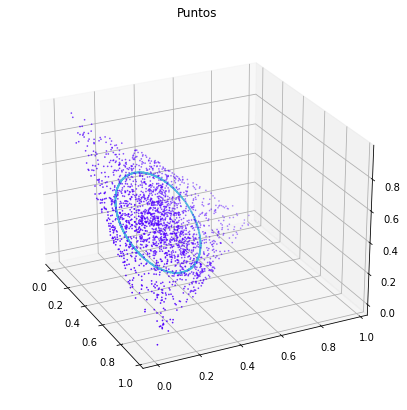

In [3]:
colorInside = "#4cb6e0"
colorOutside = "#5100ff"

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
plt.title("Puntos")
ax.view_init(25,-26)
plt.show()


Agreguemos algunos puntos anómalos

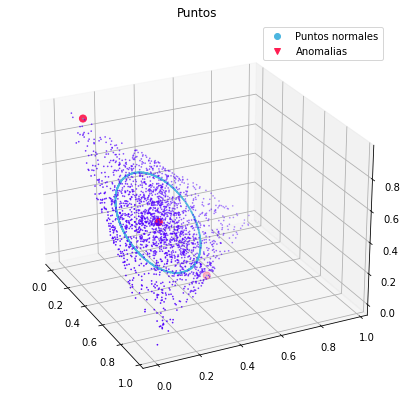

In [4]:
anomalousPoints = []
anomalousPoints.append(np.array([1,1,1])/sum([1,1,1]))
anomalousPoints.append(np.array([0.9, 0.9, 0.05])/sum([0.9,0.9,0.01]))
anomalousPoints.append(np.array([0, 0.1, 0.8])/sum([0,0.1,0.8]))
colorAnomalous = "#ff1c51"
points = list(points)
points.extend(anomalousPoints)
points = np.array(points)
anomalousPoints = np.array(anomalousPoints)
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
ax.scatter3D(anomalousPoints[:,0], anomalousPoints[:,1], anomalousPoints[:,2], color = colorAnomalous,s = 50)
#Dummy plots

dummy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorInside, marker = 'o')
dummy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorAnomalous, marker = 'v')


plt.title("Puntos")
ax.view_init(25,-26)
ax.legend([dummy1, dummy2], ['Puntos normales', 'Anomalias'], numpoints = 1)
plt.show()


### Pruebas LOF

#### Euclidiana

In [5]:
distanceType = DistanceType.EUCLIDEAN
minPoints = 4

lof = LOFArbitraryDistance(points, distanceType, minPoints)

Obteniendo matriz de distancias
0 % completado 
0 % completado 
10 % completado 
20 % completado 
30 % completado 
40 % completado 
50 % completado 
60 % completado 
70 % completado 
80 % completado 
90 % completado 


In [6]:
lofScores = lof.computeAllLOFScores()

100%|█████████████████████████████████████████████████████████████████████████████| 2003/2003 [00:16<00:00, 121.84it/s]


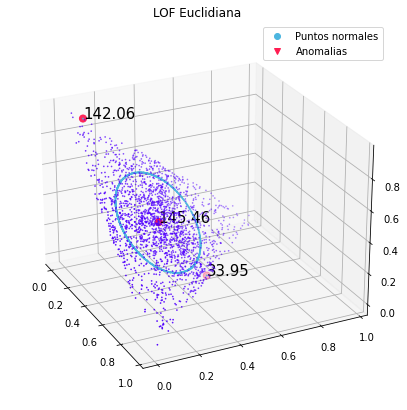

In [7]:
anomalousPoints = []
anomalousPoints.append(np.array([1,1,1])/sum([1,1,1]))
anomalousPoints.append(np.array([0.9, 0.9, 0.05])/sum([0.9,0.9,0.01]))
anomalousPoints.append(np.array([0, 0.1, 0.8])/sum([0,0.1,0.8]))
colorAnomalous = "#ff1c51"
points = list(points)
points.extend(anomalousPoints)
points = np.array(points)
anomalousPoints = np.array(anomalousPoints)
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
ax.scatter3D(anomalousPoints[:,0], anomalousPoints[:,1], anomalousPoints[:,2], color = colorAnomalous,s = 50)
ax.text(anomalousPoints[0][0], anomalousPoints[0][1], anomalousPoints[0][2], np.round(lofScores[-3],2), fontsize = 15)
ax.text(anomalousPoints[1][0], anomalousPoints[1][1], anomalousPoints[1][2], np.round(lofScores[-2],2), fontsize = 15)
ax.text(anomalousPoints[2][0], anomalousPoints[2][1], anomalousPoints[2][2], np.round(lofScores[-1],2), fontsize = 15)
#Dummy plots

dummy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorInside, marker = 'o')
dummy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorAnomalous, marker = 'v')


plt.title("LOF Euclidiana")
ax.view_init(25,-26)
ax.legend([dummy1, dummy2], ['Puntos normales', 'Anomalias'], numpoints = 1)
plt.show()

#### Manhattan

In [8]:
distanceType = DistanceType.MANHATTAN
minPoints = 4

lof = LOFArbitraryDistance(points, distanceType, minPoints)

Obteniendo matriz de distancias
0 % completado 
0 % completado 
10 % completado 
20 % completado 
30 % completado 
40 % completado 
50 % completado 
50 % completado 
60 % completado 
70 % completado 
80 % completado 
90 % completado 


In [9]:
lofScores = lof.computeAllLOFScores()

100%|█████████████████████████████████████████████████████████████████████████████| 2006/2006 [00:16<00:00, 121.63it/s]


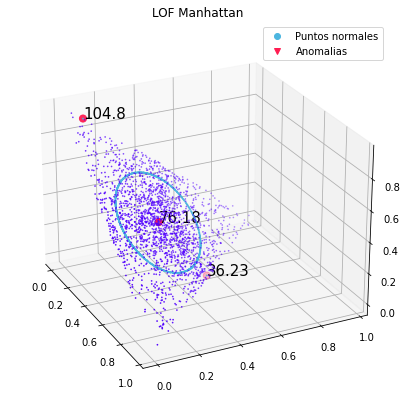

In [10]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
ax.scatter3D(anomalousPoints[:,0], anomalousPoints[:,1], anomalousPoints[:,2], color = colorAnomalous,s = 50)
ax.text(anomalousPoints[0][0], anomalousPoints[0][1], anomalousPoints[0][2], np.round(lofScores[-3],2), fontsize = 15)
ax.text(anomalousPoints[1][0], anomalousPoints[1][1], anomalousPoints[1][2], np.round(lofScores[-2],2), fontsize = 15)
ax.text(anomalousPoints[2][0], anomalousPoints[2][1], anomalousPoints[2][2], np.round(lofScores[-1],2), fontsize = 15)
#Dummy plots

dummy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorInside, marker = 'o')
dummy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorAnomalous, marker = 'v')


plt.title("LOF Manhattan")
ax.view_init(25,-26)
ax.legend([dummy1, dummy2], ['Puntos normales', 'Anomalias'], numpoints = 1)
plt.show()

#### Coseno

In [15]:
distanceType = DistanceType.COSINE
minPoints = 4

lof = LOFArbitraryDistance(points, distanceType, minPoints)

Obteniendo matriz de distancias
0 % completado 
0 % completado 
10 % completado 
20 % completado 
30 % completado 
40 % completado 
50 % completado 
50 % completado 
60 % completado 
70 % completado 
80 % completado 
90 % completado 


In [16]:
lofScores = lof.computeAllLOFScores()

100%|█████████████████████████████████████████████████████████████████████████████| 2006/2006 [00:15<00:00, 131.13it/s]


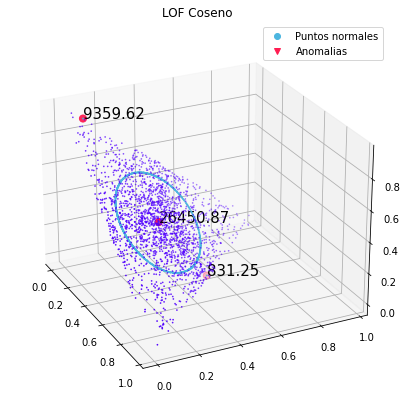

In [17]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
ax.scatter3D(anomalousPoints[:,0], anomalousPoints[:,1], anomalousPoints[:,2], color = colorAnomalous,s = 50)
ax.text(anomalousPoints[0][0], anomalousPoints[0][1], anomalousPoints[0][2], np.round(lofScores[-3],2), fontsize = 15)
ax.text(anomalousPoints[1][0], anomalousPoints[1][1], anomalousPoints[1][2], np.round(lofScores[-2],2), fontsize = 15)
ax.text(anomalousPoints[2][0], anomalousPoints[2][1], anomalousPoints[2][2], np.round(lofScores[-1],2), fontsize = 15)
#Dummy plots

dummy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorInside, marker = 'o')
dummy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorAnomalous, marker = 'v')


plt.title("LOF Coseno")
ax.view_init(25,-26)
ax.legend([dummy1, dummy2], ['Puntos normales', 'Anomalias'], numpoints = 1)
plt.show()

#### Aitchison

In [18]:
distanceType = DistanceType.AITCHISON
minPoints = 4

lof = LOFArbitraryDistance(points, distanceType, minPoints)

Obteniendo matriz de distancias
0 % completado 
0 % completado 
10 % completado 
20 % completado 
30 % completado 
40 % completado 
50 % completado 
50 % completado 
60 % completado 
70 % completado 
80 % completado 
90 % completado 


In [19]:
lofScores = lof.computeAllLOFScores()

100%|█████████████████████████████████████████████████████████████████████████████| 2006/2006 [00:16<00:00, 120.16it/s]


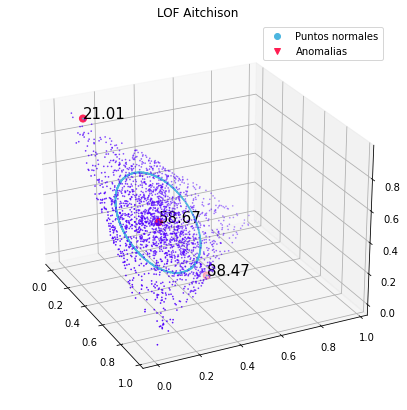

In [21]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
ax.scatter3D(anomalousPoints[:,0], anomalousPoints[:,1], anomalousPoints[:,2], color = colorAnomalous,s = 50)
ax.text(anomalousPoints[0][0], anomalousPoints[0][1], anomalousPoints[0][2], np.round(lofScores[-3],2), fontsize = 15)
ax.text(anomalousPoints[1][0], anomalousPoints[1][1], anomalousPoints[1][2], np.round(lofScores[-2],2), fontsize = 15)
ax.text(anomalousPoints[2][0], anomalousPoints[2][1], anomalousPoints[2][2], np.round(lofScores[-1],2), fontsize = 15)
#Dummy plots

dummy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorInside, marker = 'o')
dummy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorAnomalous, marker = 'v')


plt.title("LOF Aitchison")
ax.view_init(25,-26)
ax.legend([dummy1, dummy2], ['Puntos normales', 'Anomalias'], numpoints = 1)
plt.show()

#### Wasserstein

In [31]:
distanceType = DistanceType.WASSERSTEIN
minPoints = 5

lof = LOFArbitraryDistance(points, distanceType, minPoints)

Obteniendo matriz de distancias
0 % completado 
0 % completado 
10 % completado 
20 % completado 
30 % completado 
40 % completado 
50 % completado 
50 % completado 
60 % completado 
70 % completado 
80 % completado 
90 % completado 


In [36]:
lofScores = lof.computeAllLOFScores()

100%|██████████████████████████████████████████████████████████████████████████████| 2006/2006 [00:55<00:00, 35.98it/s]


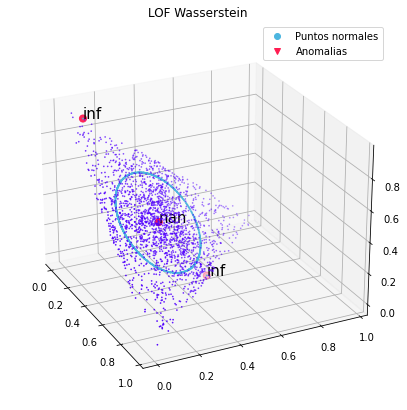

In [38]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(points[:,0], points[:,1], points[:,2], color = colorInside, s= 0.5)
ax.scatter3D(outsidePoints[:,0], outsidePoints[:,1], outsidePoints[:,2], color = colorOutside,s = 0.5)
ax.scatter3D(anomalousPoints[:,0], anomalousPoints[:,1], anomalousPoints[:,2], color = colorAnomalous,s = 50)
ax.text(anomalousPoints[0][0], anomalousPoints[0][1], anomalousPoints[0][2], np.round(lofScores[-3],2), fontsize = 15)
ax.text(anomalousPoints[1][0], anomalousPoints[1][1], anomalousPoints[1][2], np.round(lofScores[-2],2), fontsize = 15)
ax.text(anomalousPoints[2][0], anomalousPoints[2][1], anomalousPoints[2][2], np.round(lofScores[-1],2), fontsize = 15)
#Dummy plots

dummy1 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorInside, marker = 'o')
dummy2 = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colorAnomalous, marker = 'v')


plt.title("LOF Wasserstein")
ax.view_init(25,-26)
ax.legend([dummy1, dummy2], ['Puntos normales', 'Anomalias'], numpoints = 1)
plt.show()

In [34]:
lof.distanceMatrix

array([[0.        , 0.9       , 0.83333333, ..., 0.13333333, 0.2       ,
        1.3       ],
       [0.9       , 0.        , 0.16666667, ..., 0.4       , 0.6       ,
        0.56666667],
       [0.83333333, 0.16666667, 0.        , ..., 0.5       , 0.73333333,
        0.53333333],
       ...,
       [0.13333333, 0.4       , 0.5       , ..., 0.        , 0.53333333,
        0.83333333],
       [0.2       , 0.6       , 0.73333333, ..., 0.53333333, 0.        ,
        1.36666667],
       [1.3       , 0.56666667, 0.53333333, ..., 0.83333333, 1.36666667,
        0.        ]])

In [35]:
lofScores

[inf,
 nan,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 nan,
 inf,
 inf,
 nan,
 nan,
 inf,
 nan,
 inf,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 inf,
 nan,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 1.0234315948601664,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 inf,
 inf,
 nan,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 nan,
 inf,
 inf,
 nan,
 nan,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 inf,
 inf,
 nan,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 nan,
 nan,
 inf,
 inf,
 